## Description:
               The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import random
#Hyper Parameter tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import RandomizedSearchCV
#Data Transformation
from sklearn.preprocessing import StandardScaler,RobustScaler
#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings 
#ignore all warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv("D:\ML\Classification\Diabetis\diabetes.csv")  #read the dataset
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Dataset Details

    *Pregnancies: Number of times pregnant
    *Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    *BloodPressure: Diastolic blood pressure (mm Hg)
    *SkinThickness: Triceps skin fold thickness (mm)
    *Insulin: 2-Hour serum insulin (mu U/ml)
    *BMI: Body mass index (weight in kg/(height in m)2)
    *DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of          diabetes based on family history)
    *Age: Age (years)
    *Outcome: Class variable (0 = non-diabetic, 1 = diabetic)

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note the Minimum value in Above table.Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction 
those minimum values are Zero.No chance to these features are in Zero. Zero values are missing values.

### Filling the Missing values

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#first replace the Zero values as NaN
#fill the Nan with mean value of the feature
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']:
    df[i] = df[i].replace(0,np.nan)
    df[i] = df[i].fillna(df[i].mean())
    

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratry of the data

In [10]:
df.corr()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

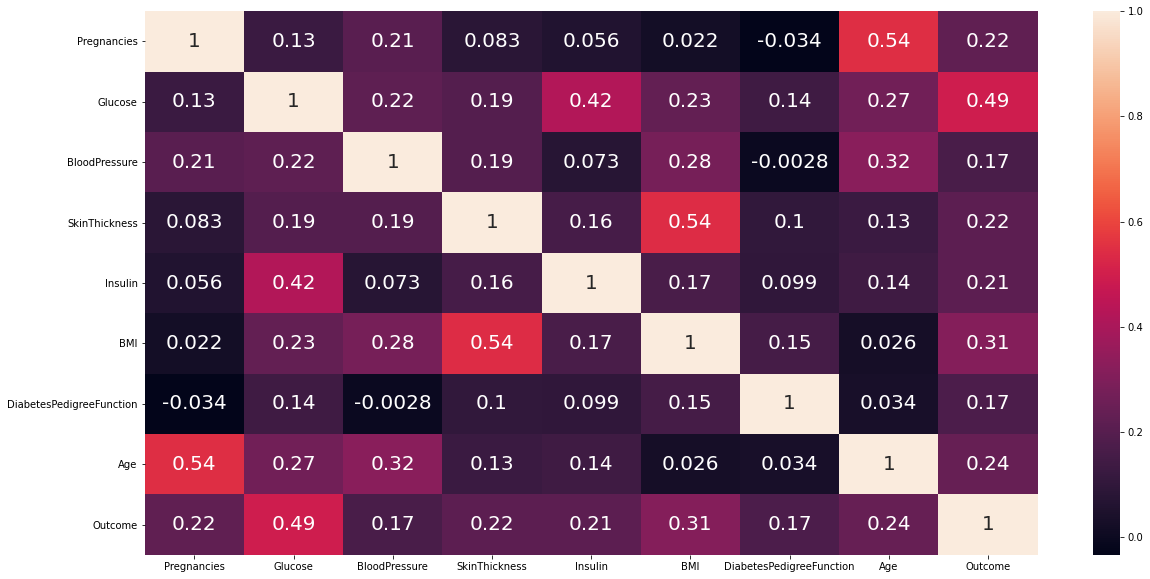

In [11]:
plt.figure(figsize=(20,10))     #relation Between all features
sns.heatmap(df.corr(),annot=True,annot_kws={"size":20})

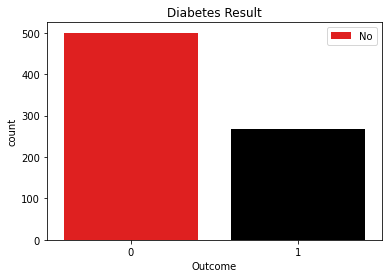

In [12]:
sns.countplot(df.Outcome,palette=["r","black"])
plt.legend(["No"])
plt.title("Diabetes Result")
plt.show()

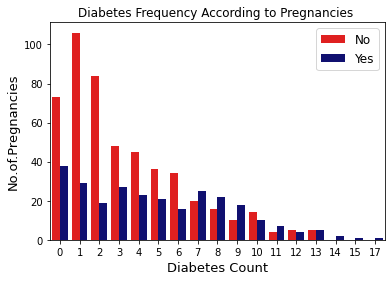

In [13]:
sns.countplot(df.Pregnancies,hue=df.Outcome,palette=["red","navy"])
plt.legend(["No","Yes"],loc="upper right",fontsize=12)
plt.title("Diabetes Frequency According to Pregnancies ")
plt.xlabel("Diabetes Count",fontsize=13)
plt.ylabel("No.of.Pregnancies",fontsize=13)
plt.show()

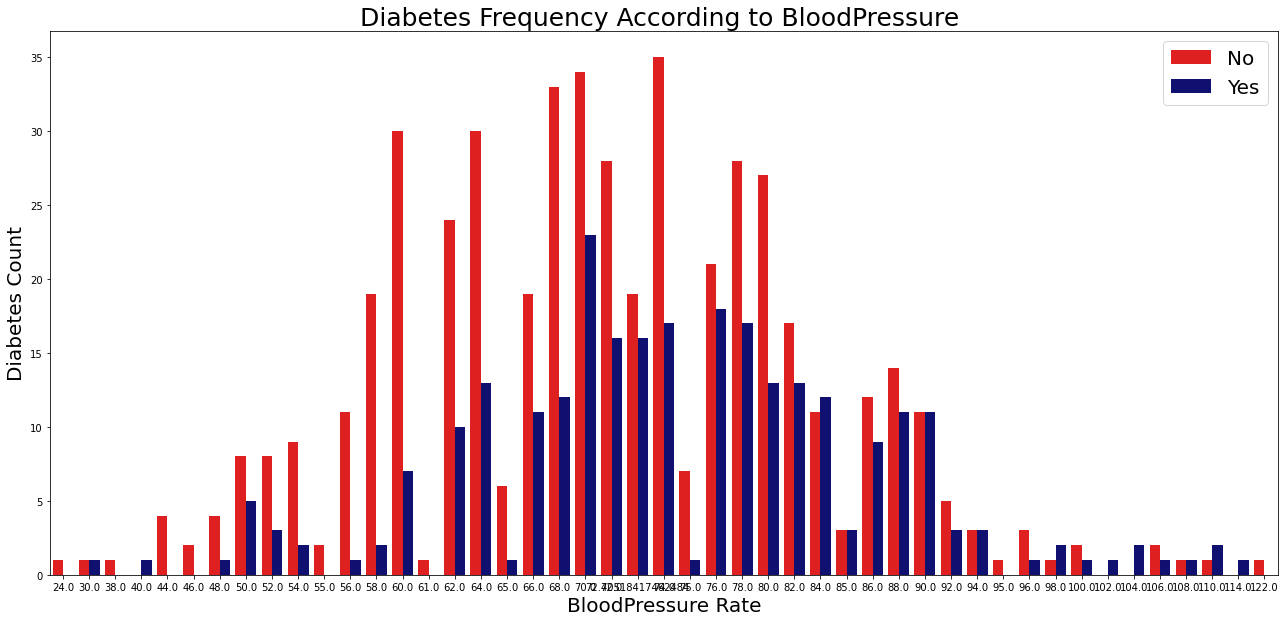

In [14]:
plt.figure(figsize=(22,10))
sns.countplot(df.BloodPressure,hue=df.Outcome,palette=["red","navy"])
plt.legend(["No","Yes"],fontsize=20,loc="upper right")
plt.title("Diabetes Frequency According to BloodPressure ",fontsize=25)
plt.ylabel("Diabetes Count",fontsize=20)
plt.xlabel("BloodPressure Rate",fontsize=20)
plt.show()

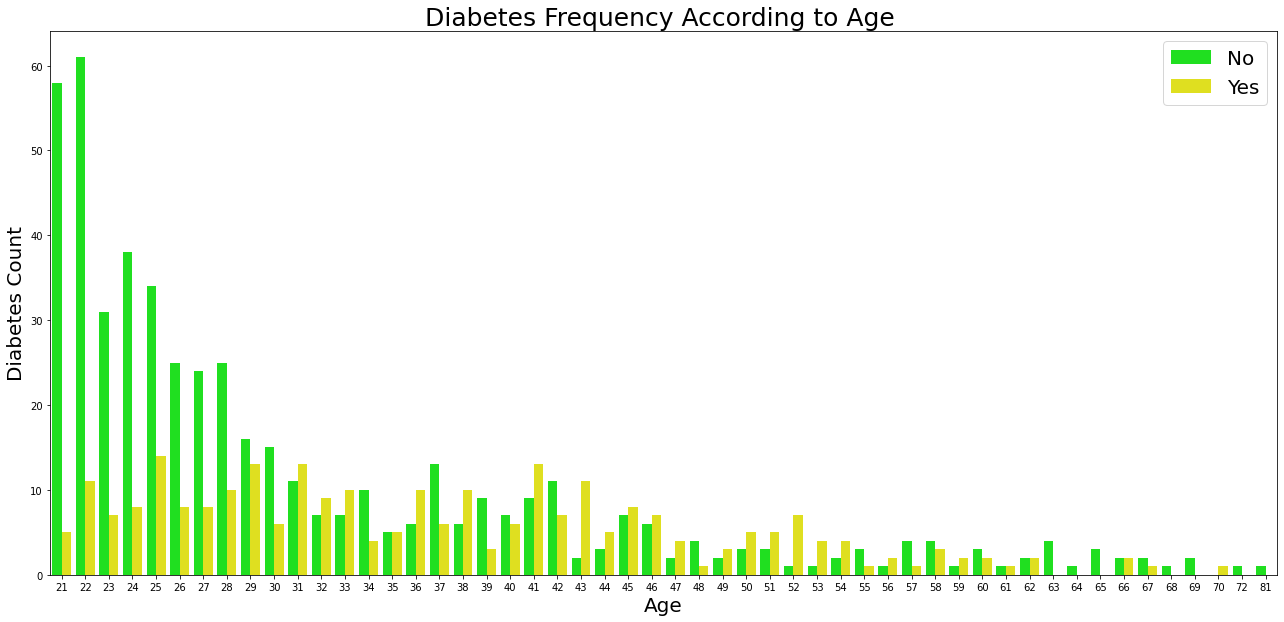

In [15]:
plt.figure(figsize=(22,10))
sns.countplot(df.Age,hue=df.Outcome,palette=["lime","yellow"])
plt.legend(["No","Yes"],fontsize=20,loc="upper right")
plt.title("Diabetes Frequency According to Age ",fontsize=25)
plt.ylabel("Diabetes Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.show()

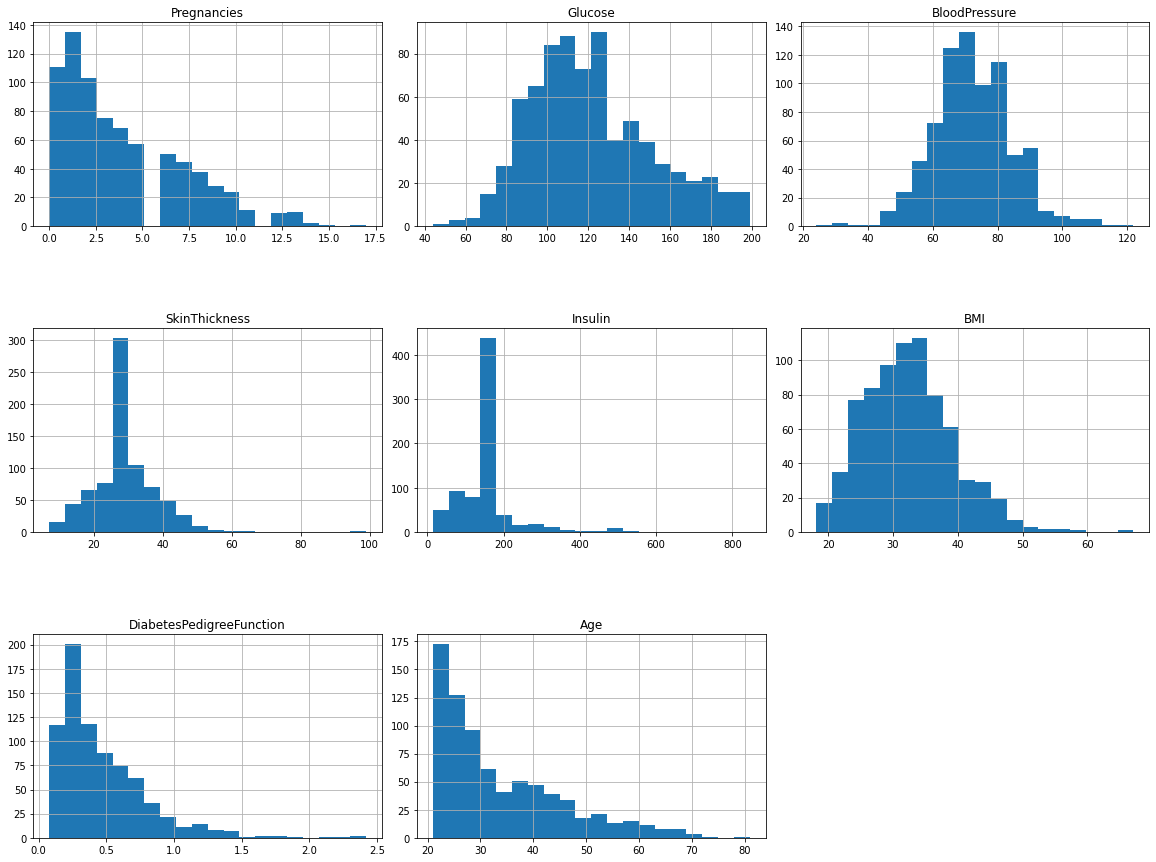

In [16]:
col = df.columns[:8]               #Histogram for all features
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in zip(col, range(length)):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

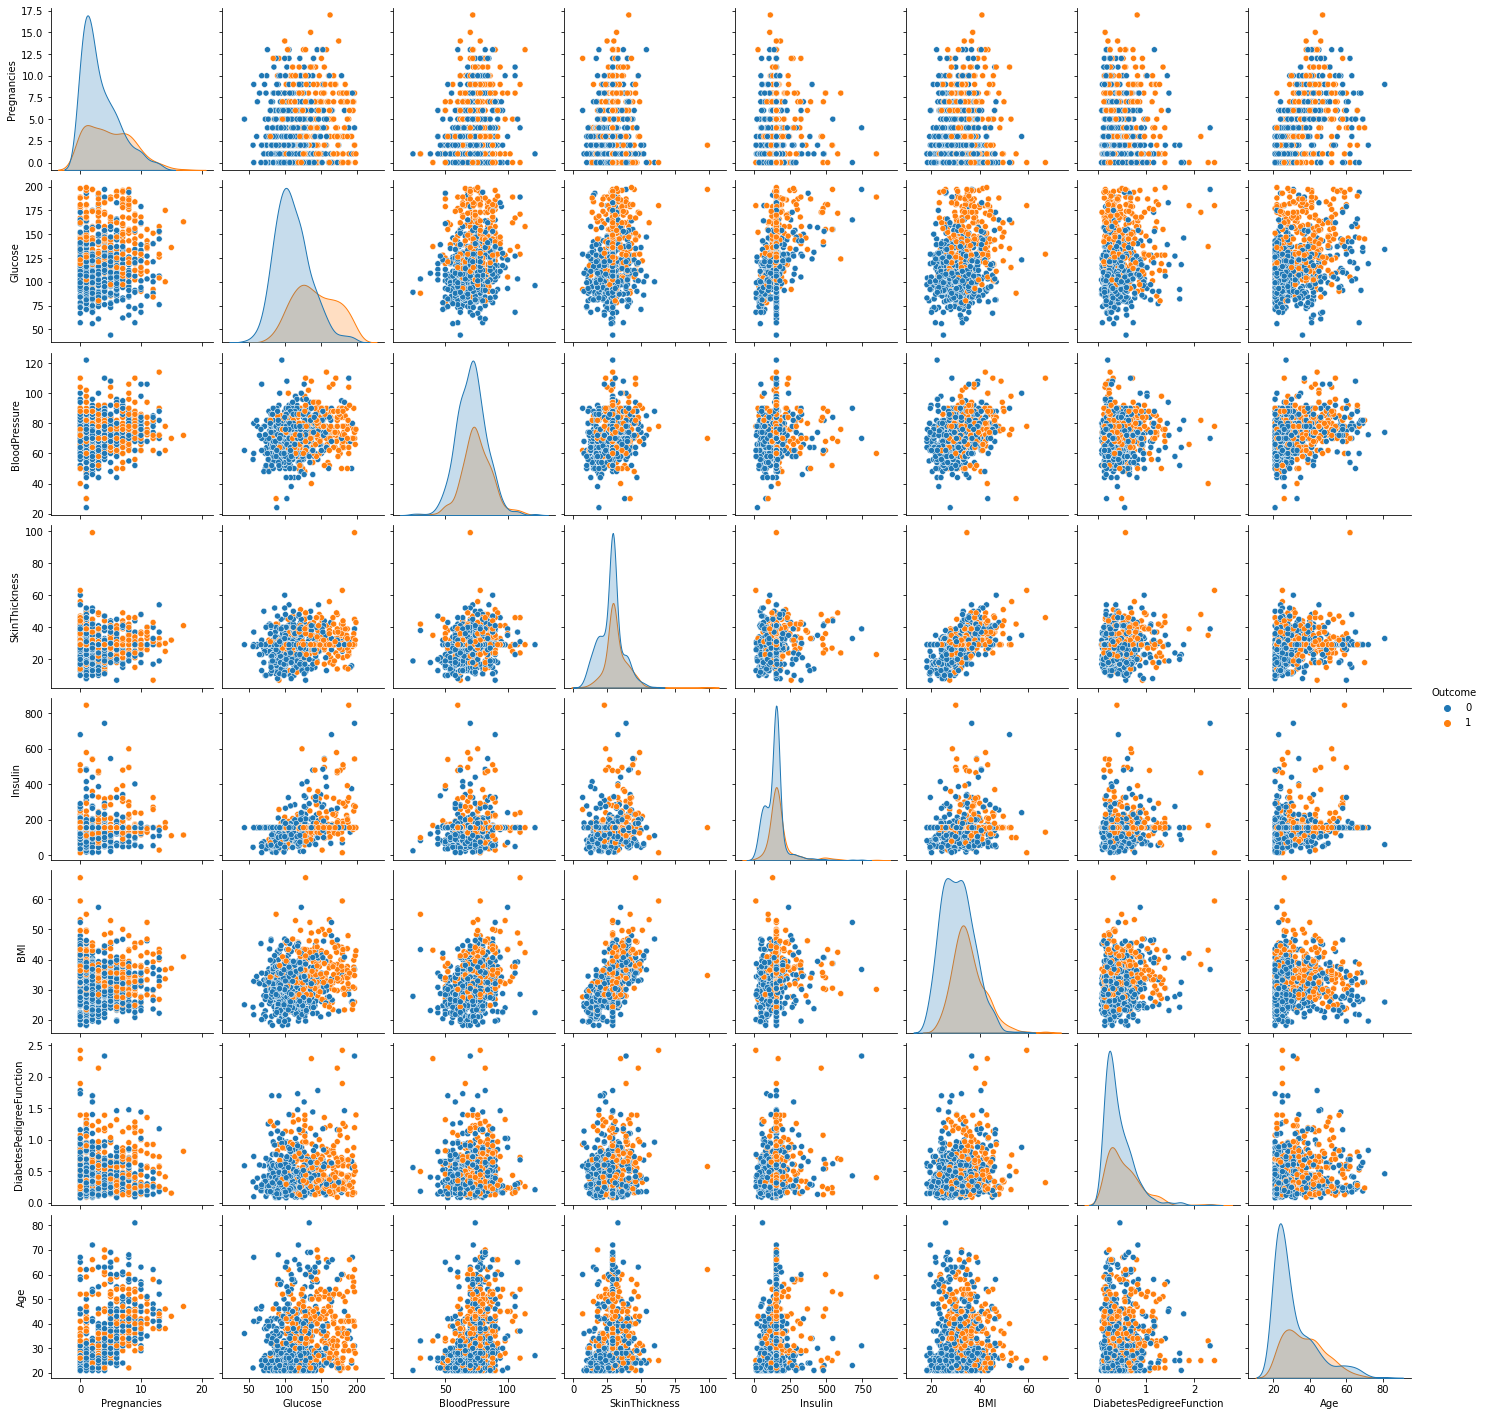

In [17]:
sns.pairplot(data= df,hue="Outcome")     #Spread of the data 
plt.show()

## TEST TRAIN SPLIT

In [18]:
x= df.iloc[:,:-1]
y = df.iloc[:,-1] 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)   

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


###  EVALUATION METRICS FOR MODELS

In [21]:
Training_Accuracy_Score = []
Testing_Accuracy_Score =[]
Training_F1_Score = []
Testing_F1_Score = []
Training_Precision =[]
Testing_Precision = []
Training_Recall = []
Testing_Recall = []
Model = []
cros_val_scr = []

In [22]:
def prediction(x_train,x_test,y_train,y_test,model,algo):        
        print(f"Predictions for {algo} Algorithem")
        Model.append(algo)        
        print("Train Results: ")
        print("================")
        pre = model.predict(x_train)
        print("        Training Accuracy Score   : {:.2f} %".format((metrics.accuracy_score(y_train,pre))*100))
        print("")
        print("        Training F1 Score         : {:.4f} ".format((metrics.f1_score(y_train,pre,average="macro"))))
        print("")       
        print("        Training Precision        : {:.4f} ".format((metrics.precision_score(y_train,pre,average="macro"))))
        print("")
        print("        Training Recall           : {:.4f} ".format((metrics.recall_score(y_train,pre,average="macro"))))
        print()
        print(f"       Training Classification Report  :    ")
        print('--------------------------------------------------')
        print(f" {metrics.classification_report(y_train,pre)}")
        print("")
        print("")
        print("Test Results: ")
        print("================")
        pre_t = model.predict(x_test)
        print("        Testing Accuracy Score    : {:.2f} %".format((metrics.accuracy_score(y_test,pre_t))*100))
        print("")        
        print("        Testing F1 Score          : {:.4f} ".format((metrics.f1_score(y_test,pre_t,average="macro"))))
        print("")        
        print("        Testing Precision         : {:.4f} ".format((metrics.precision_score(y_test,pre_t,average="macro"))))
        print("")
        print("        Testing Recall            : {:.4f} ".format((metrics.recall_score(y_test,pre_t,average="macro"))))
        print()
        print(f"        Testing Classification Report  :  ")
        print('-------------------------------------------------')
        print(f" {metrics.classification_report(y_test,pre_t)}")        
        Training_Accuracy_Score.append(round((metrics.accuracy_score(y_train,pre)*100),2))
        Testing_Accuracy_Score.append(round((metrics.accuracy_score(y_test,pre_t)*100),2))
        Training_F1_Score.append(round((metrics.f1_score(y_train,pre,average="macro")),3))
        Testing_F1_Score.append(round((metrics.f1_score(y_test,pre_t,average="macro")),3))
        Training_Precision.append(round((metrics.precision_score(y_train,pre,average="macro")),3))
        Testing_Precision.append(round((metrics.precision_score(y_test,pre_t,average="macro")),3))
        Training_Recall.append(round((metrics.recall_score(y_train,pre,average="macro")),3))
        Testing_Recall.append(round((metrics.recall_score(y_test,pre_t,average="macro")),3))

# cross validation score 

In [23]:
def cvs(x,y,model,algo):
    cv = cross_val_score(model,x,y,cv=5)
    print(f"Cross validation Score for {algo} : {round(cv.mean()*100,2)} %")
    cros_val_scr.append(round((cv.mean()*100),2))

# confusion matrix

In [24]:
colorm = ["YlOrRd","BuPu","PuBu","YlGn","RdBu"]
import random as ran
def con_mat(x_test,y_test,model,algo):
    print(f"Confusion matrix for {algo} Algorithem")
    pre_t = model.predict(x_test)
    cm_lr = metrics.confusion_matrix(y_test,pre_t)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm_lr,cmap=ran.choice(colorm),annot=True,cbar=True, fmt=".0f",annot_kws={"size": 20})

# DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
algo = "Decision Tree Classifier"
model = dtc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Decision Tree Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Test Results: 
        Testing Accuracy Score    : 73.38 %

        Testing F1 Score          : 0.6880 

        Testing Precision         : 0.6869 

        Testing Recall            : 0.6891 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f

In [26]:
cvs(x,y,model,algo)

Cross validation Score for Decision Tree Classifier : 69.55 %


Confusion matrix for Decision Tree Classifier Algorithem


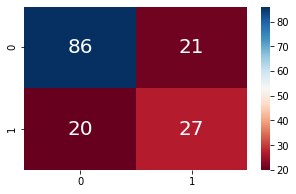

In [27]:
con_mat(x_test,y_test,model,algo)

# Support vector classifier

In [28]:
svc = SVC()
algo = "Support Vector Classifier"
model = svc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Support Vector Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 75.41 %

        Training F1 Score         : 0.7084 

        Training Precision        : 0.7471 

        Training Recall           : 0.6980 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       393
           1       0.73      0.50      0.59       221

    accuracy                           0.75       614
   macro avg       0.75      0.70      0.71       614
weighted avg       0.75      0.75      0.74       614



Test Results: 
        Testing Accuracy Score    : 79.22 %

        Testing F1 Score          : 0.7298 

        Testing Precision         : 0.7686 

        Testing Recall            : 0.7133 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f

In [29]:
cvs(x,y,model,algo)

Cross validation Score for Support Vector Classifier : 76.05 %


Confusion matrix for Support Vector Classifier Algorithem


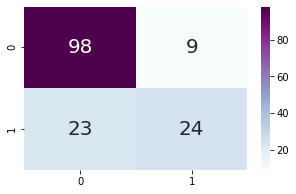

In [30]:
con_mat(x_test,y_test,model,algo)

# KNeighborsClassifier

In [31]:

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

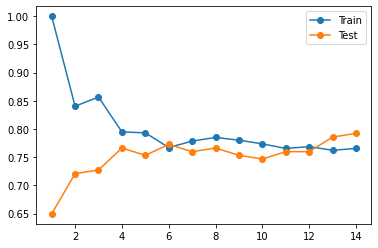

In [32]:
plt.plot(range(1,15),train_scores,label="Train",marker="o")
plt.plot(range(1,15),test_scores,label="Test",marker="o")
plt.legend()

In [33]:
knn = KNeighborsClassifier(n_neighbors=12)
algo = "K-Nearest Neighbor"
model = knn.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for K-Nearest Neighbor Algorithem
Train Results: 
        Training Accuracy Score   : 76.87 %

        Training F1 Score         : 0.7317 

        Training Precision        : 0.7595 

        Training Recall           : 0.7213 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       393
           1       0.74      0.55      0.63       221

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



Test Results: 
        Testing Accuracy Score    : 75.97 %

        Testing F1 Score          : 0.7077 

        Testing Precision         : 0.7158 

        Testing Recall            : 0.7018 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-score

In [34]:
cvs(x,y,model,algo)

Cross validation Score for K-Nearest Neighbor : 74.49 %


Confusion matrix for K-Nearest Neighbor Algorithem


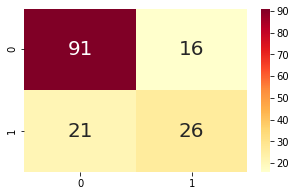

In [35]:
con_mat(x_test,y_test,model,algo)

# GaussianNB

In [36]:

gnb = GaussianNB()
algo = "Gaussian Naive Bays"
model = gnb.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Gaussian Naive Bays Algorithem
Train Results: 
        Training Accuracy Score   : 74.92 %

        Training F1 Score         : 0.7232 

        Training Precision        : 0.7278 

        Training Recall           : 0.7199 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       393
           1       0.66      0.62      0.64       221

    accuracy                           0.75       614
   macro avg       0.73      0.72      0.72       614
weighted avg       0.75      0.75      0.75       614



Test Results: 
        Testing Accuracy Score    : 78.57 %

        Testing F1 Score          : 0.7426 

        Testing Precision         : 0.7477 

        Testing Recall            : 0.7384 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-scor

In [37]:
cvs(x,y,model,algo)

Cross validation Score for Gaussian Naive Bays : 75.13 %


Confusion matrix for Gaussian Naive Bays Algorithem


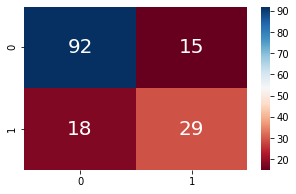

In [38]:
con_mat(x_test,y_test,model,algo)

# RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()
algo = "Random Forest Classifier"
model = rfc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Random Forest Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Test Results: 
        Testing Accuracy Score    : 79.87 %

        Testing F1 Score          : 0.7612 

        Testing Precision         : 0.7629 

        Testing Recall            : 0.7597 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f

In [40]:
cvs(x,y,model,algo)

Cross validation Score for Random Forest Classifier : 76.05 %


Confusion matrix for Random Forest Classifier Algorithem


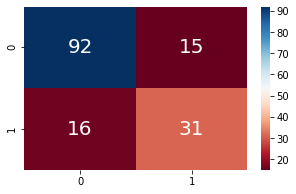

In [41]:
con_mat(x_test,y_test,model,algo)

# AdaBoostClassifier

In [42]:
abc = AdaBoostClassifier(n_estimators=200)
algo = "Ada Boost Classifier"
model = abc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Ada Boost Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 88.11 %

        Training F1 Score         : 0.8692 

        Training Precision        : 0.8749 

        Training Recall           : 0.8645 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       393
           1       0.86      0.81      0.83       221

    accuracy                           0.88       614
   macro avg       0.87      0.86      0.87       614
weighted avg       0.88      0.88      0.88       614



Test Results: 
        Testing Accuracy Score    : 80.52 %

        Testing F1 Score          : 0.7842 

        Testing Precision         : 0.7747 

        Testing Recall            : 0.8061 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [43]:
cvs(x,y,model,algo)

Cross validation Score for Ada Boost Classifier : 75.52 %


Confusion matrix for Ada Boost Classifier Algorithem


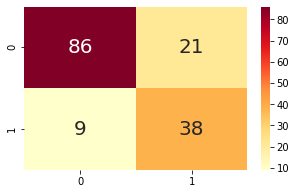

In [44]:
con_mat(x_test,y_test,model,algo)

# GradientBoostingClassifier

In [45]:
gbc=GradientBoostingClassifier(random_state=42)
algo='GradientBoostingClassifier'
model=gbc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for GradientBoostingClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 91.69 %

        Training F1 Score         : 0.9078 

        Training Precision        : 0.9190 

        Training Recall           : 0.8995 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       393
           1       0.93      0.84      0.88       221

    accuracy                           0.92       614
   macro avg       0.92      0.90      0.91       614
weighted avg       0.92      0.92      0.92       614



Test Results: 
        Testing Accuracy Score    : 79.87 %

        Testing F1 Score          : 0.7641 

        Testing Precision         : 0.7626 

        Testing Recall            : 0.7657 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  

In [46]:
cvs(x,y,model,algo)

Cross validation Score for GradientBoostingClassifier : 77.08 %


Confusion matrix for GradientBoostingClassifier Algorithem


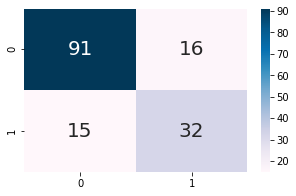

In [47]:
con_mat(x_test,y_test,model,algo)

# ExtraTreesClassifier

In [48]:
etc=ExtraTreesClassifier(n_estimators=190,random_state=0,max_depth=10,min_samples_leaf=3,min_samples_split=2)
algo='ExtraTreesClassifier'
model=etc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 82.41 %

        Training F1 Score         : 0.7878 

        Training Precision        : 0.8532 

        Training Recall           : 0.7685 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       393
           1       0.91      0.57      0.70       221

    accuracy                           0.82       614
   macro avg       0.85      0.77      0.79       614
weighted avg       0.84      0.82      0.81       614



Test Results: 
        Testing Accuracy Score    : 80.52 %

        Testing F1 Score          : 0.7425 

        Testing Precision         : 0.7936 

        Testing Recall            : 0.7226 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [49]:
cvs(x,y,model,algo)

Cross validation Score for ExtraTreesClassifier : 77.09 %


Confusion matrix for ExtraTreesClassifier Algorithem


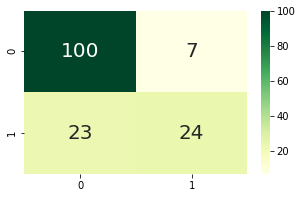

In [50]:
con_mat(x_test,y_test,model,algo)

# Create table for metrics

In [51]:
results = {"Model":Model,"Training_Accuracy_Score":Training_Accuracy_Score,"Testing_Accuracy_Score":Testing_Accuracy_Score,"Training_F1_Score":Training_F1_Score,
           "Testing_F1_Score":Testing_F1_Score,"Training_Precision":Training_Precision,"Testing_Precision":Testing_Precision,"Training_Recall":Training_Recall,
           "Testing_Recall":Testing_Recall,"cros_val_scr":cros_val_scr}

df1 = pd.concat([pd.Series(v,name=k) for k,v in results.items()],axis=1)
df1.set_index("Model",inplace=True)
df1

,Training_Accuracy_Score,Testing_Accuracy_Score,Training_F1_Score,Testing_F1_Score,Training_Precision,Testing_Precision,Training_Recall,Testing_Recall,cros_val_scr
Model,,,,,,,,,
Decision Tree Classifier,100.00,73.38,1.000,0.688,1.000,0.687,1.000,0.689,69.55
Support Vector Classifier,75.41,79.22,0.708,0.730,0.747,0.769,0.698,0.713,76.05
K-Nearest Neighbor,76.87,75.97,0.732,0.708,0.759,0.716,0.721,0.702,74.49
Gaussian Naive Bays,74.92,78.57,0.723,0.743,0.728,0.748,0.720,0.738,75.13
Random Forest Classifier,100.00,79.87,1.000,0.761,1.000,0.763,1.000,0.760,76.05
Ada Boost Classifier,88.11,80.52,0.869,0.784,0.875,0.775,0.865,0.806,75.52
GradientBoostingClassifier,91.69,79.87,0.908,0.764,0.919,0.763,0.899,0.766,77.08
ExtraTreesClassifier,82.41,80.52,0.788,0.742,0.853,0.794,0.769,0.723,77.09


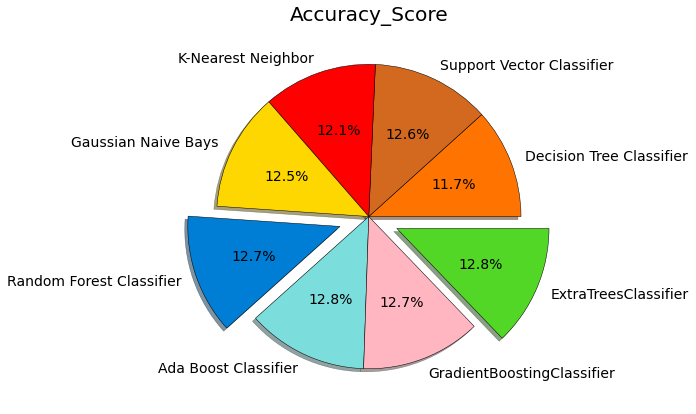

In [52]:
res = []
for i in Testing_Accuracy_Score:
    val = round(i/np.sum(Testing_Accuracy_Score),4)
    res.append(val)

label = [i for i in Model]
color = ["#FF7300","chocolate","#FF0000","gold","#007ED6","#7CDDDD","lightpink","#52D726","salmon"]
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")
explode = [0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2]
plt.pie(res,labels=label,autopct="%1.1f%%",explode=explode,colors=color,shadow=True,wedgeprops={"edgecolor":"black"})
plt.title("Accuracy_Score")
plt.show()

# Hyperparameter for RandomForestClassifier

In [53]:
param_grid = {
    'max_depth': list(range(5, 25)),
    'min_samples_split': list(range(4, 11)),
    'min_samples_leaf': list(range(4, 11))}
rf_new = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
rf_new.fit(x,y)
rf_new.best_params_

{'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 6}

In [54]:
rf= RandomForestClassifier(n_estimators=800,random_state=0,max_depth=18,
                              min_samples_leaf=4,
                              min_samples_split=6)
rfc_model=rf.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,rfc_model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 91.86 %

        Training F1 Score         : 0.9101 

        Training Precision        : 0.9182 

        Training Recall           : 0.9037 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.92      0.85      0.88       221

    accuracy                           0.92       614
   macro avg       0.92      0.90      0.91       614
weighted avg       0.92      0.92      0.92       614



Test Results: 
        Testing Accuracy Score    : 83.77 %

        Testing F1 Score          : 0.8025 

        Testing Precision         : 0.8140 

        Testing Recall            : 0.7937 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [55]:
cvs(x,y,model,algo)

Cross validation Score for ExtraTreesClassifier : 77.09 %


Confusion matrix for ExtraTreesClassifier Algorithem


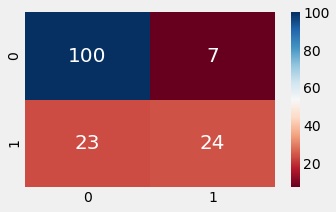

In [56]:
con_mat(x_test,y_test,model,algo)

# Hyperparameter for  AdaBoostClassifier

In [57]:
param_grid = {'n_estimators':[80,90,100,120],
    'algorithm': ['SAMME', 'SAMME.R']}
rf_new = GridSearchCV(AdaBoostClassifier(), param_grid, n_jobs=-1)
rf_new.fit(x,y)
rf_new.best_params_

{'algorithm': 'SAMME', 'n_estimators': 80}

In [58]:
abc = AdaBoostClassifier(n_estimators=80,learning_rate=1.0,random_state=0,algorithm = 'SAMME')
rf.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,rf_new,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 78.01 %

        Training F1 Score         : 0.7513 

        Training Precision        : 0.7668 

        Training Recall           : 0.7431 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       393
           1       0.73      0.61      0.67       221

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614



Test Results: 
        Testing Accuracy Score    : 84.42 %

        Testing F1 Score          : 0.8163 

        Testing Precision         : 0.8163 

        Testing Recall            : 0.8163 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [59]:
cvs(x,y,rf_new,algo)

Cross validation Score for ExtraTreesClassifier : 76.05 %


Confusion matrix for ExtraTreesClassifier Algorithem


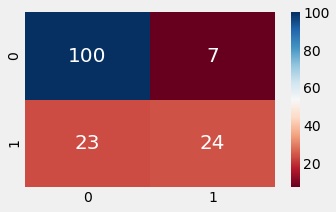

In [60]:
con_mat(x_test,y_test,model,algo)

# Hyperparameter for ExtraTreesClassifier

In [61]:
etc=ExtraTreesClassifier(n_estimators=190,random_state=0,max_depth=10,min_samples_leaf=3,min_samples_split=2)
algo='ExtraTreesClassifier'
model=etc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 82.41 %

        Training F1 Score         : 0.7878 

        Training Precision        : 0.8532 

        Training Recall           : 0.7685 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       393
           1       0.91      0.57      0.70       221

    accuracy                           0.82       614
   macro avg       0.85      0.77      0.79       614
weighted avg       0.84      0.82      0.81       614



Test Results: 
        Testing Accuracy Score    : 80.52 %

        Testing F1 Score          : 0.7425 

        Testing Precision         : 0.7936 

        Testing Recall            : 0.7226 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [64]:
param_grid = {'n_estimators': range(50,126,25),
    'max_depth': list(range(5, 25)),
    'min_samples_split': list(range(4, 11)),
    'min_samples_leaf': list(range(4, 11))}
rf_new = GridSearchCV(ExtraTreesClassifier(), param_grid, n_jobs=-1)
rf_new.fit(x,y)
rf_new.best_params_

{'max_depth': 24,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [65]:
etc=ExtraTreesClassifier(n_estimators=100,random_state=0,max_depth=15,min_samples_leaf=4,min_samples_split=10)
algo='ExtraTreesClassifier'
model=etc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 82.41 %

        Training F1 Score         : 0.7885 

        Training Precision        : 0.8510 

        Training Recall           : 0.7695 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.80      0.96      0.88       393
           1       0.90      0.57      0.70       221

    accuracy                           0.82       614
   macro avg       0.85      0.77      0.79       614
weighted avg       0.84      0.82      0.81       614



Test Results: 
        Testing Accuracy Score    : 79.87 %

        Testing F1 Score          : 0.7361 

        Testing Precision         : 0.7807 

        Testing Recall            : 0.7179 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

# Hyperparameter for GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[80,90,100,120],'min_samples_split':[2,3,4],
              'max_depth':[3,5,8,10],"max_features" : ['sqrt', 'log2'],
              'min_samples_leaf': [1,2,3]}
rs = RandomizedSearchCV(gbc,parameters,cv=5,n_jobs=-1)
rs.fit(x_train, y_train)
print ("r2 / variance : ", rs.best_score_)

r2 / variance :  0.767093162734906


In [67]:
 prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 90.72 %

        Training F1 Score         : 0.8977 

        Training Precision        : 0.9049 

        Training Recall           : 0.8918 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       393
           1       0.90      0.84      0.87       221

    accuracy                           0.91       614
   macro avg       0.90      0.89      0.90       614
weighted avg       0.91      0.91      0.91       614



Test Results: 
        Testing Accuracy Score    : 82.47 %

        Testing F1 Score          : 0.7990 

        Testing Precision         : 0.7922 

        Testing Recall            : 0.8082 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [68]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 3}

In [69]:

gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[90],'min_samples_split':[3],
              'max_depth':[3],"max_features" : ['log2'],
              'min_samples_leaf': [3]}
grid = GridSearchCV(gbc,parameters,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  0.7622017859522858


In [70]:
 prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 90.72 %

        Training F1 Score         : 0.8977 

        Training Precision        : 0.9049 

        Training Recall           : 0.8918 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       393
           1       0.90      0.84      0.87       221

    accuracy                           0.91       614
   macro avg       0.90      0.89      0.90       614
weighted avg       0.91      0.91      0.91       614



Test Results: 
        Testing Accuracy Score    : 82.47 %

        Testing F1 Score          : 0.7990 

        Testing Precision         : 0.7922 

        Testing Recall            : 0.8082 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [71]:

cvs(x,y,model,algo)

Cross validation Score for ExtraTreesClassifier : 76.7 %


Confusion matrix for ExtraTreesClassifier Algorithem


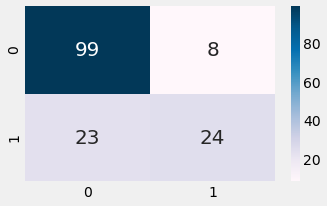

In [72]:
con_mat(x_test,y_test,model,algo)

# RandomForestClassifier perform well

In [77]:
rf= RandomForestClassifier(n_estimators=800,random_state=0,max_depth=18,
                              min_samples_leaf=4,
                              min_samples_split=6)
final_model=rf.fit(x,y)
prediction(x_train,x_test,y_train,y_test,final_model,algo)

Predictions for ExtraTreesClassifier Algorithem
Train Results: 
        Training Accuracy Score   : 91.21 %

        Training F1 Score         : 0.9027 

        Training Precision        : 0.9119 

        Training Recall           : 0.8957 

       Training Classification Report  :    
--------------------------------------------------
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       393
           1       0.91      0.84      0.87       221

    accuracy                           0.91       614
   macro avg       0.91      0.90      0.90       614
weighted avg       0.91      0.91      0.91       614



Test Results: 
        Testing Accuracy Score    : 95.45 %

        Testing F1 Score          : 0.9454 

        Testing Precision         : 0.9545 

        Testing Recall            : 0.9375 

        Testing Classification Report  :  
-------------------------------------------------
               precision    recall  f1-sco

In [78]:
import pickle
file=open('random_forest_classifier.pkl','wb')
pickle.dump(final_model,file)

In [7]:
import pickle
import sklearn

model = pickle.load(open('random_forest_classifier.pkl', 'rb'))
#prediction=model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
n = model.predict([[1,85.55,66,29,0,26.5,0.351,31]])
print(n)

[0]
